In [1]:
import os
os.chdir("../../../")
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

from src import algorithms

In [3]:
with open('experiments/nursery/results/policy_objects_v1.pickle', 'rb') as f:
    policies = pickle.load(f)

In [4]:
policies

({'Random': <src.algorithms.random_policy.RandomPolicy at 0x107d83eb0>,
  '$\\epsilon$-greedy': <src.algorithms.egreedy.EpsilonGreedy at 0x107d83550>,
  'UCB1': <src.algorithms.ucb.UCB1 at 0x107d837c0>,
  'LinUCB': <src.algorithms.linucb.LinUCB at 0x107d83370>,
  'PS-LinUCB': <src.algorithms.ps_linucb.PSLinUCB at 0x107d80f40>,
  'SimOOS': [<src.algorithms.sim_oos.SimOOSAlgorithm at 0x13a417580>,
  'Algorithm1': [<src.algorithms.alg1.Algorithm1 at 0x13a44b370>,
  'Oracle': <src.algorithms.oracle_alg1.Algorithm1_Oracle at 0x13e8cfdc0>},)

In [5]:
alg1_objects = policies[0]['Algorithm1']
oracle = policies[0]['Oracle']
simoos_objects = policies[0]['SimOOS']

In [6]:
def get_accuracy_new(alg1_object):
    N_FEATURES = alg1_object.max_no_red_context
    counts = np.zeros(N_FEATURES+1, dtype=int)
    rewards = np.zeros(N_FEATURES+1, dtype=int)
    accuracies = np.zeros(N_FEATURES+1)
    
    T = len(alg1_object.selected_context_SimOOS)
    
    # for each l what happens when we observe up to l features
    for l in range(len(counts)):
        for j in range(l+1):
            for t in range(T):
                observation = alg1_object.selected_context_SimOOS[t, :]
                reward = alg1_object.collected_rewards_SimOOS[t]
                num_observed = np.count_nonzero(observation)
                
                indicator = 1 if (num_observed == j) else 0
                counts[l] += indicator
                rewards[l] += reward * indicator
                
    print(rewards)
    print(counts)
    for l in range(len(accuracies)):
        accuracies[l] = rewards[l] / counts[l] if counts[l] != 0 else 0
    return accuracies

In [7]:
get_accuracy_new(alg1_objects[0])

[   2    2 8588 8595 8597 8598]
[    3     8  9974  9992  9998 10000]


array([0.66666667, 0.25      , 0.8610387 , 0.86018815, 0.85987197,
       0.8598    ])

In [8]:
alg1_accuracies = np.stack([get_accuracy_new(alg1) for alg1 in alg1_objects])

[   2    2 8588 8595 8597 8598]
[    3     8  9974  9992  9998 10000]
[   0    2 8527 8529 8530 8530]
[    1     8  9981  9993  9999 10000]
[   0    5 8435 8437 8442 8442]
[    1    13  9970  9982  9999 10000]
[   0    2    6 8051 8053 8053]
[    1     7    20  9992  9999 10000]
[   0    2    9 8390 8391 8391]
[    1     8    28  9993  9999 10000]


In [9]:
simoos_accuracies = np.stack([get_accuracy_new(simoos) for simoos in simoos_objects])

[   0    5 1151 1962 5700 5700]
[    1    17  2096  4156  9999 10000]
[   0  418 2091 4671 4671 4671]
[    1   706  4014  9994  9999 10000]
[   1    2 1576 5047 5468 5468]
[    4    12  2526  8037  9999 10000]
[   0    1 2145 5224 5224 5224]
[    1     9  3806  9994  9999 10000]
[   0  137  147 7195 7208 7208]
[    1   259   283  9951  9999 10000]


In [10]:
accuracies = {
    
    'Algorithm1': np.mean(alg1_accuracies, axis=0),
#     'Oracle': get_accuracy_new(oracle),
    'Sim-OOS': np.mean(simoos_accuracies, axis=0),
}

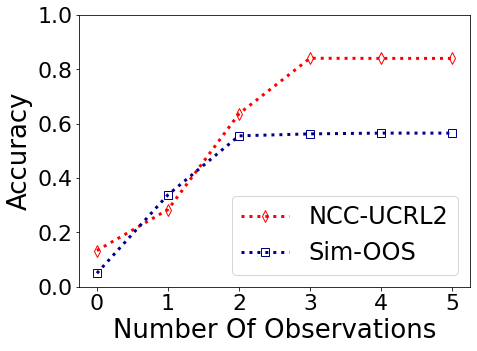

In [18]:


fig, ax = plt.subplots(1, figsize=(7, 5))
ind_to_params = {
        # ind: (mark, color)
        0: ('d','red'), 1:('s', 'darkblue') , 2:('o','deepskyblue') , 3: ('>','orange'),
        4: ('^', 'm'), 5: ('<', 'k'), 6: ('x','green'),
    }

for ind, (algorithm_name, accuracy_for_cost) in enumerate(accuracies.items()):
    
    if algorithm_name == 'Algorithm1':
        algorithm_name = "NCC-UCRL2"
    mark, color = ind_to_params[ind]
    ax.plot(
        range(len(accuracy_for_cost)),
        accuracy_for_cost,
        label=algorithm_name,
        marker=mark, markersize=8, fillstyle='none',
        c=color, linestyle=':', linewidth=3,
    )
    
ax.set_xlabel('Number Of Observations', fontsize=26)
ax.set_ylabel('Accuracy', fontsize=26)
ax.set_ylim(0.0, 1.0)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Only integer labels

plt.legend(prop={'size': 24}, loc='lower right');
plt.savefig('experiments/nursery/making_figures/nursery_accuracy.pdf', bbox_inches='tight')

plt.show()